In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from keras.datasets import cifar10
from tensorflow.keras import layers

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [3]:
# Reduce pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
 
# flatten the label values
# make them as an array 
y_train, y_test = y_train.flatten(), y_test.flatten()

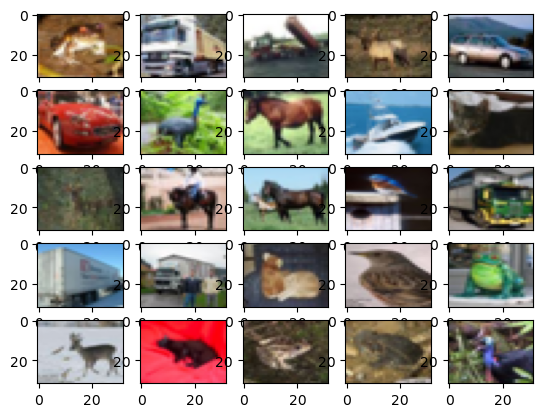

In [4]:
# visualize data by plotting images
fig, ax = plt.subplots(5, 5)
k = 0
 
for i in range(5):
    for j in range(5):
        ax[i][j].imshow(x_train[k], aspect='auto')
        k += 1
 
plt.show()


In [5]:
import keras

K = len(set(y_train))
print("number of classes:", K)


model = keras.Sequential([
    
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=x_train[0].shape),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dropout(0.2),
    
    Dense(1024, activation='relu'),
    Dropout(0.2),
    
    Dense(k, activation='softmax')
])

# Model description
model.summary()

number of classes: 10
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None

In [6]:
# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# Fit
r = model.fit(
  x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
1563/1563 [==============================] - 20s 7ms/step - loss: 1.3075 - accuracy: 0.5511 - val_loss: 1.0684 - val_accuracy: 0.6237
Epoch 2/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8590 - accuracy: 0.7017 - val_loss: 0.8343 - val_accuracy: 0.7115
Epoch 3/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6974 - accuracy: 0.7588 - val_loss: 0.7403 - val_accuracy: 0.7505
Epoch 4/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5866 - accuracy: 0.7994 - val_loss: 0.6648 - val_accuracy: 0.7722
Epoch 5/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5046 - accuracy: 0.8266 - val_loss: 0.6754 - val_accuracy: 0.7790
Epoch 6/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4283 - accuracy: 0.8524 - val_loss: 0.6168 - val_accuracy: 0.8016
Epoch 7/50
1563/1563 [==============================] - 9s 5ms/step - loss: 0.3610 - accuracy: 0.8754 - val_loss: 0.5798 - val_accuracy

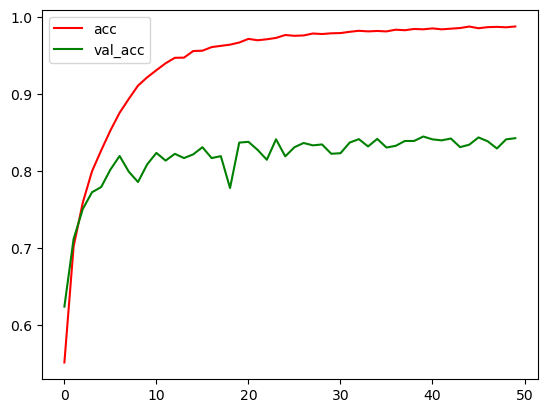

In [8]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc', color='red')
plt.plot(r.history['val_accuracy'], label='val_acc', color='green')
plt.legend()

In [9]:
# Fit with data augmentation
# Note: if you run this AFTER calling
# the previous model.fit()
# it will CONTINUE training where it left off
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True)
 
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
 
r = model.fit(train_generator, validation_data=(x_test, y_test),
              steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
1562/1562 [==============================] - 9s 6ms/step - loss: 0.3410 - accuracy: 0.8985 - val_loss: 0.4735 - val_accuracy: 0.8510
Epoch 2/50
1562/1562 [==============================] - 8s 5ms/step - loss: 0.2453 - accuracy: 0.9243 - val_loss: 0.5194 - val_accuracy: 0.8515
Epoch 3/50
1562/1562 [==============================] - 8s 5ms/step - loss: 0.2096 - accuracy: 0.9344 - val_loss: 0.4514 - val_accuracy: 0.8591
Epoch 4/50
1562/1562 [==============================] - 8s 5ms/step - loss: 0.1812 - accuracy: 0.9422 - val_loss: 0.4685 - val_accuracy: 0.8566
Epoch 5/50
1562/1562 [==============================] - 9s 6ms/step - loss: 0.1588 - accuracy: 0.9489 - val_loss: 0.5120 - val_accuracy: 0.8605
Epoch 6/50
1562/1562 [==============================] - 8s 5ms/step - loss: 0.1416 - accuracy: 0.9551 - val_loss: 0.5127 - val_accuracy: 0.8535
Epoch 7/50
1562/1562 [==============================] - 8s 5ms/step - loss: 0.1272 - accuracy: 0.9587 - val_loss: 0.5219 - val_accuracy:

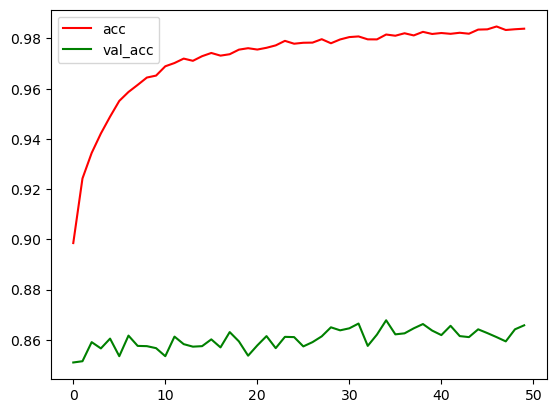

In [10]:
plt.plot(r.history['accuracy'], label='acc', color='red')
plt.plot(r.history['val_accuracy'], label='val_acc', color='green')
plt.legend()

In [11]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
   rescale=1.0/255.0,           # Normalize pixel values
    rotation_range=20,           # Random rotation up to 20 degrees
    width_shift_range=0.2,       # Random width shifts
    height_shift_range=0.2,      # Random height shifts
    horizontal_flip=True,        # Horizontal flipping
    zoom_range=0.2,              # Random zooming
    shear_range=0.2,             # Random shearing
    fill_mode='nearest')
 
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
 
r = model.fit(train_generator, validation_data=(x_test, y_test),
              steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
1562/1562 [==============================] - 19s 12ms/step - loss: 1.1662 - accuracy: 0.6126 - val_loss: 1759.6368 - val_accuracy: 0.2154
Epoch 2/50
1562/1562 [==============================] - 16s 10ms/step - loss: 0.8571 - accuracy: 0.7132 - val_loss: 1266.4554 - val_accuracy: 0.2051
Epoch 3/50
1562/1562 [==============================] - 16s 10ms/step - loss: 0.7955 - accuracy: 0.7296 - val_loss: 1274.7939 - val_accuracy: 0.2232
Epoch 4/50
1562/1562 [==============================] - 17s 11ms/step - loss: 0.7479 - accuracy: 0.7466 - val_loss: 1031.8042 - val_accuracy: 0.2884
Epoch 5/50
1562/1562 [==============================] - 16s 10ms/step - loss: 0.7156 - accuracy: 0.7588 - val_loss: 715.5290 - val_accuracy: 0.2529
Epoch 6/50
1562/1562 [==============================] - 17s 11ms/step - loss: 0.6952 - accuracy: 0.7657 - val_loss: 798.2812 - val_accuracy: 0.2646
Epoch 7/50
1562/1562 [==============================] - 16s 10ms/step - loss: 0.6717 - accuracy: 0.7710 - va

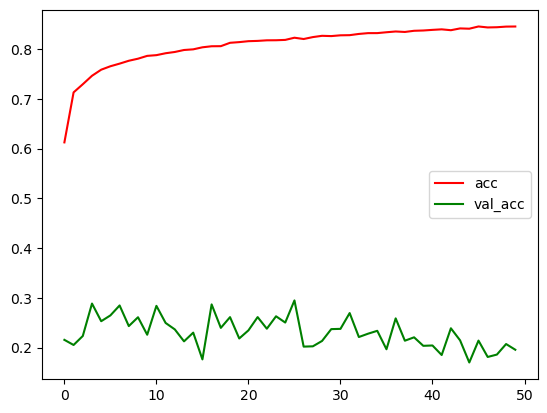

In [12]:
plt.plot(r.history['accuracy'], label='acc', color='red')
plt.plot(r.history['val_accuracy'], label='val_acc', color='green')
plt.legend()

In [13]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,           # Random rotation up to 20 degrees
    width_shift_range=0.2,       # Random width shifts
    height_shift_range=0.2,      # Random height shifts
    horizontal_flip=True,        # Horizontal flipping
    zoom_range=0.2,              # Random zooming
    shear_range=0.2,             # Random shearing
    fill_mode='nearest')
 
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
 
r = model.fit(train_generator, validation_data=(x_test, y_test),
              steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
1562/1562 [==============================] - 17s 11ms/step - loss: 0.4807 - accuracy: 0.8369 - val_loss: 0.3830 - val_accuracy: 0.8731
Epoch 2/50
1562/1562 [==============================] - 16s 10ms/step - loss: 0.4535 - accuracy: 0.8460 - val_loss: 0.3818 - val_accuracy: 0.8773
Epoch 3/50
1562/1562 [==============================] - 15s 10ms/step - loss: 0.4509 - accuracy: 0.8470 - val_loss: 0.3872 - val_accuracy: 0.8729
Epoch 4/50
1562/1562 [==============================] - 17s 11ms/step - loss: 0.4413 - accuracy: 0.8513 - val_loss: 0.3693 - val_accuracy: 0.8798
Epoch 5/50
1562/1562 [==============================] - 16s 10ms/step - loss: 0.4425 - accuracy: 0.8488 - val_loss: 0.3745 - val_accuracy: 0.8757
Epoch 6/50
1562/1562 [==============================] - 16s 10ms/step - loss: 0.4334 - accuracy: 0.8538 - val_loss: 0.3819 - val_accuracy: 0.8767
Epoch 7/50
1562/1562 [==============================] - 17s 11ms/step - loss: 0.4339 - accuracy: 0.8547 - val_loss: 0.3757 -

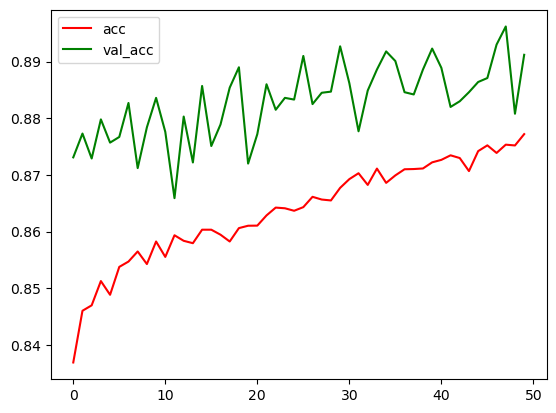

In [14]:
plt.plot(r.history['accuracy'], label='acc', color='red')
plt.plot(r.history['val_accuracy'], label='val_acc', color='green')
plt.legend()

In [16]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,           # Random rotation up to 20 degrees
    width_shift_range=0.2,       # Random width shifts
    height_shift_range=0.2,      # Random height shifts
    horizontal_flip=True,        # Horizontal flipping
    zoom_range=0.2,              # Random zooming
    shear_range=0.2,             # Random shearing
    featurewise_center=True,
    featurewise_std_normalization=True,
    fill_mode='nearest')
 
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
 
r = model.fit(train_generator, validation_data=(x_test, y_test),
              steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
   3/1562 [..............................] - ETA: 1:28 - loss: 0.1966 - accuracy: 0.9375

c:\Users\fafaf\anaconda3\envs\tf\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
c:\Users\fafaf\anaconda3\envs\tf\lib\site-packages\keras_preprocessing\image\image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


1562/1562 [==============================] - 16s 10ms/step - loss: 0.3666 - accuracy: 0.8766 - val_loss: 0.3293 - val_accuracy: 0.8908
Epoch 2/50
1562/1562 [==============================] - 17s 11ms/step - loss: 0.3606 - accuracy: 0.8779 - val_loss: 0.3540 - val_accuracy: 0.8914
Epoch 3/50
1562/1562 [==============================] - 16s 10ms/step - loss: 0.3648 - accuracy: 0.8755 - val_loss: 0.3372 - val_accuracy: 0.8883
Epoch 4/50
1562/1562 [==============================] - 16s 10ms/step - loss: 0.3645 - accuracy: 0.8775 - val_loss: 0.3474 - val_accuracy: 0.8915
Epoch 5/50
1562/1562 [==============================] - 17s 11ms/step - loss: 0.3634 - accuracy: 0.8762 - val_loss: 0.3828 - val_accuracy: 0.8820
Epoch 6/50
1562/1562 [==============================] - 16s 10ms/step - loss: 0.3536 - accuracy: 0.8807 - val_loss: 0.3525 - val_accuracy: 0.8864
Epoch 7/50
1562/1562 [==============================] - 16s 10ms/step - loss: 0.3549 - accuracy: 0.8801 - val_loss: 0.3597 - val_accura

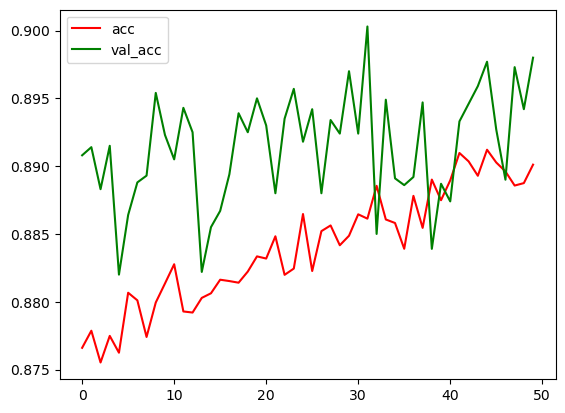

In [17]:
plt.plot(r.history['accuracy'], label='acc', color='red')
plt.plot(r.history['val_accuracy'], label='val_acc', color='green')
plt.legend()